# MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/User/Desktop/DS4B/03_MACHINE_LEARNING/08_CASOS/01_leadScoring'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [5]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [6]:
pipe = Pipeline([('algoritmo',LogisticRegression())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]},
        
        
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [7]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.03,0.00,0.00,0.00,LogisticRegression(),0.25,-1,none,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.85,0.87,0.86,0.01,1
11,0.04,0.00,0.01,0.01,LogisticRegression(),0.50,-1,none,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.85,0.87,0.86,0.01,2
15,0.04,0.01,0.00,0.00,LogisticRegression(),0.75,-1,none,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.85,0.87,0.86,0.01,3
19,0.04,0.00,0.00,0.00,LogisticRegression(),1,-1,none,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.85,0.87,0.86,0.01,4
13,0.03,0.00,0.00,0.00,LogisticRegression(),0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.84,0.87,0.86,0.01,5
17,0.05,0.01,0.00,0.00,LogisticRegression(),1,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.84,0.87,0.86,0.01,6
9,0.05,0.01,0.02,0.01,LogisticRegression(),0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.84,0.87,0.86,0.01,7
18,0.05,0.00,0.01,0.01,LogisticRegression(),1,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.86,0.85,0.87,0.86,0.01,8
14,0.03,0.00,0.01,0.01,LogisticRegression(),0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.86,0.84,0.87,0.86,0.01,9
5,0.03,0.00,0.02,0.01,LogisticRegression(),0.25,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.86,0.84,0.87,0.86,0.01,10


## EVALUAR

### Predecir sobre validación

In [8]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [9]:
roc_auc_score(val_y, pred)

0.8927789782113034

### Examinar el mejor modelo

In [10]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=0.25, n_jobs=-1, penalty='none',
                                    solver='saga'))])

In [11]:
modelo.best_estimator_.named_steps.algoritmo.coef_

array([[ 4.16114438,  7.61184663,  1.03753182, -2.66337588,  2.39298894,
         0.61436275, -0.68138185,  1.89833269, -1.37527863, -1.29196907,
        -0.55997045, -1.06351488,  0.50520165,  0.009683  ,  2.29428423]])

In [12]:
modelo.best_estimator_.named_steps.algoritmo.feature_names_in_

array(['tiempo_en_site_total_mms', 'score_actividad_mms',
       'ult_actividad_SMS Sent', 'paginas_vistas_visita_mms',
       'visitas_total_mms', 'score_perfil_mms', 'ambito_Select',
       'ocupacion_Working Professional',
       'ult_actividad_Converted to Lead',
       'ult_actividad_Chat Conversation', 'ocupacion_Unemployed',
       'ult_actividad_Page Visited on Website', 'descarga_lm_No',
       'ambito_Marketing Management', 'origen_Lead Add Form'],
      dtype=object)

In [13]:
pd.DataFrame(data = modelo.best_estimator_.named_steps.algoritmo.coef_,
             columns=modelo.best_estimator_.named_steps.algoritmo.feature_names_in_).unstack().sort_values(ascending=False)

score_actividad_mms                    0    7.61
tiempo_en_site_total_mms               0    4.16
visitas_total_mms                      0    2.39
origen_Lead Add Form                   0    2.29
ocupacion_Working Professional         0    1.90
ult_actividad_SMS Sent                 0    1.04
score_perfil_mms                       0    0.61
descarga_lm_No                         0    0.51
ambito_Marketing Management            0    0.01
ocupacion_Unemployed                   0   -0.56
ambito_Select                          0   -0.68
ult_actividad_Page Visited on Website  0   -1.06
ult_actividad_Chat Conversation        0   -1.29
ult_actividad_Converted to Lead        0   -1.38
paginas_vistas_visita_mms              0   -2.66
dtype: float64

## REPORTING DEL MODELO

### Gain Chart

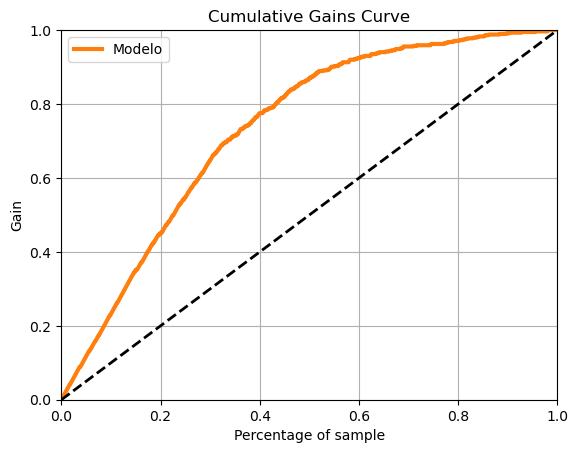

In [14]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### Lift Chart

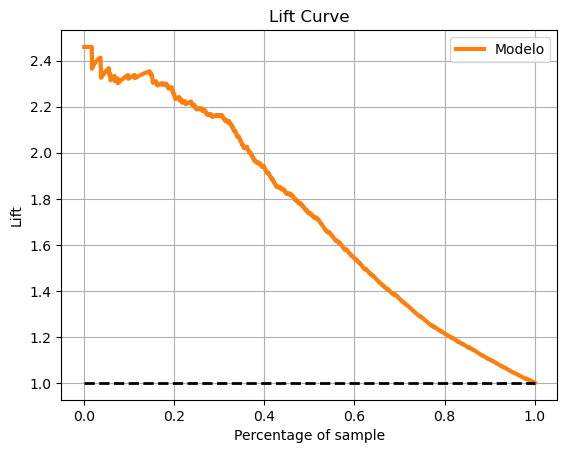

In [15]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### ROC Chart

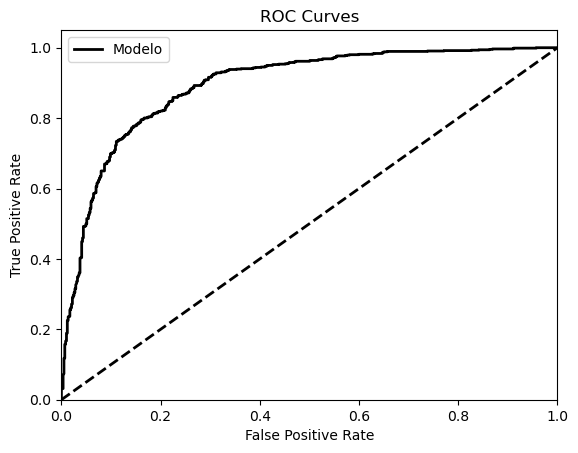

In [16]:
fig, ax = plt.subplots()

# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)

# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()

# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)

# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['Modelo']

ax.legend(new_handles, new_labels, loc='best')

# Ahora puedes mostrar el gráfico
plt.show();
